In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [41]:
from sklearn import datasets
data = datasets.load_iris()

In [42]:
print('Features')
for f in data.feature_names:
  print(' - ' + f)

print()
print('Targets')
for t in data.target_names:
  print(' - ' + t)

print(data.filename)

Features
 - sepal length (cm)
 - sepal width (cm)
 - petal length (cm)
 - petal width (cm)

Targets
 - setosa
 - versicolor
 - virginica
/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv


In [43]:
df = pd.DataFrame(data.data, columns = data.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
df['target'] = data.target

df[df['target'] == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [45]:
x = data.data

y = data.target

x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [46]:
print(x_tr.shape)

print(y_tr.shape)

print()

print(x_te.shape)

print(y_te.shape)

(112, 4)
(112,)

(38, 4)
(38,)


In [50]:
from sklearn.metrics import confusion_matrix

In [52]:
model = MLPClassifier(hidden_layer_sizes=[10, 5], max_iter=1000, verbose=10)
model.fit(x_tr, y_tr)

Iteration 1, loss = 1.97478880
Iteration 2, loss = 1.95358443
Iteration 3, loss = 1.93260411
Iteration 4, loss = 1.91182476
Iteration 5, loss = 1.89125075
Iteration 6, loss = 1.87087301
Iteration 7, loss = 1.85071083
Iteration 8, loss = 1.83078162
Iteration 9, loss = 1.81109170
Iteration 10, loss = 1.79163871
Iteration 11, loss = 1.77243512
Iteration 12, loss = 1.75345404
Iteration 13, loss = 1.73473148
Iteration 14, loss = 1.71626397
Iteration 15, loss = 1.69803109
Iteration 16, loss = 1.68003949
Iteration 17, loss = 1.66227426
Iteration 18, loss = 1.64474400
Iteration 19, loss = 1.62745406
Iteration 20, loss = 1.61039824
Iteration 21, loss = 1.59358441
Iteration 22, loss = 1.57703939
Iteration 23, loss = 1.56076417
Iteration 24, loss = 1.54473279
Iteration 25, loss = 1.52897419
Iteration 26, loss = 1.51344835
Iteration 27, loss = 1.49815095
Iteration 28, loss = 1.48309776
Iteration 29, loss = 1.46829847
Iteration 30, loss = 1.45376562
Iteration 31, loss = 1.43947601
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[10, 5], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [ ]:
print("Train score : ", model.score(x_tr, y_tr))

print("Test score : ", model.score(x_te, y_te))

Train score :  0.9821428571428571
Test score :  0.9736842105263158


In [ ]:
conf_mat = confusion_matrix(y_tr, model.predict(x_tr))

conf_mat_norm = conf_mat / np.sum(conf_mat, axis=0, keepdims=True)

print(conf_mat)

print(conf_mat_norm)

[[39  0  0]
 [ 0 35  2]
 [ 0  0 36]]
[[1.         0.         0.        ]
 [0.         1.         0.05263158]
 [0.         0.         0.94736842]]


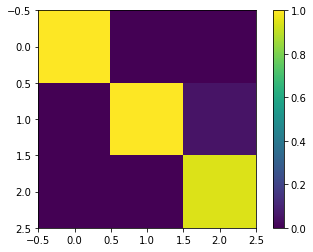

['setosa' 'versicolor' 'virginica']


In [ ]:
plt.imshow(conf_mat_norm)
plt.colorbar()
plt.show()

print(data.target_names)

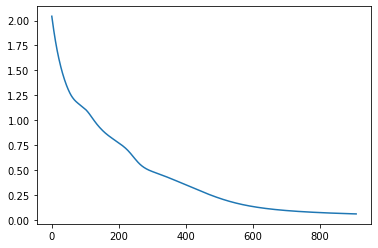

In [ ]:
plt.plot(model.loss_curve_)